In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import requests as rq
import zipfile as zf
import scipy.stats as sps
from scipy.stats import norm
import seaborn as sns
import struct
import binascii
import scipy
import scipy.misc
import scipy.cluster
from io import StringIO, BytesIO
import urllib
import urllib3
import urllib.request
import time
import colorsys
import PIL
from PIL import Image
from PIL import ImageStat
import math
import csv
import cv2 as cv2
import os
import locale
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib
import networkx as nx
import re

/Users/jasonshi/anaconda3/envs/art/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Sample Image

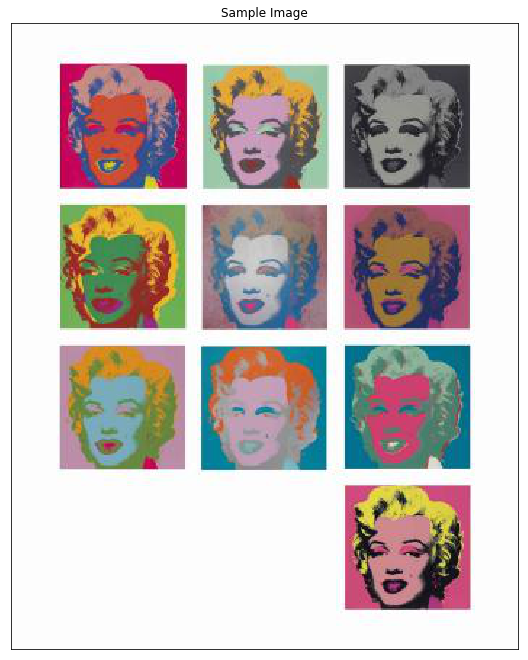

In [2]:
url = "http://artinfo-images-350.s3.amazonaws.com/asi2-116183/382.jpg"
get_url = rq.get(url)
theimage = Image.open(BytesIO(get_url.content))
img=np.array(theimage) 

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img)
plt.title('Sample Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Dominant Color

This function returns the hue of the most dominat color in the image. It first creates a predefined number of clusters from the RGB values in the image array. A larger number of clusters produces a more accurate result but is computationally more expensive. It then assigns codes to each item in the newly clustered array. A histogram counts the number of occurances of each code. The RGB value that has the highest number of occurances is the most dominat in the image.

A post-processing step is required here. The RGB value of the most dominant color is converted into HSL (hue,saturation, lightness). Thresholding is then used to assign each color to a bucket from the following: blacks, whites, grays, reds, yellows, greens, cyans, blues, magentas, reds.

Assume 5 clusters and calculate the RGB values of the image. The RGB value that has the highest number of occurances is the most dominant color in the image.

/Users/jasonshi/anaconda3/envs/art/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `fromimage` is deprecated!
`fromimage` is deprecated in SciPy 1.0.0. and will be removed in 1.2.0.
Use ``np.asarray(im)`` instead.
  


The most dominant color is whites


/Users/jasonshi/anaconda3/envs/art/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


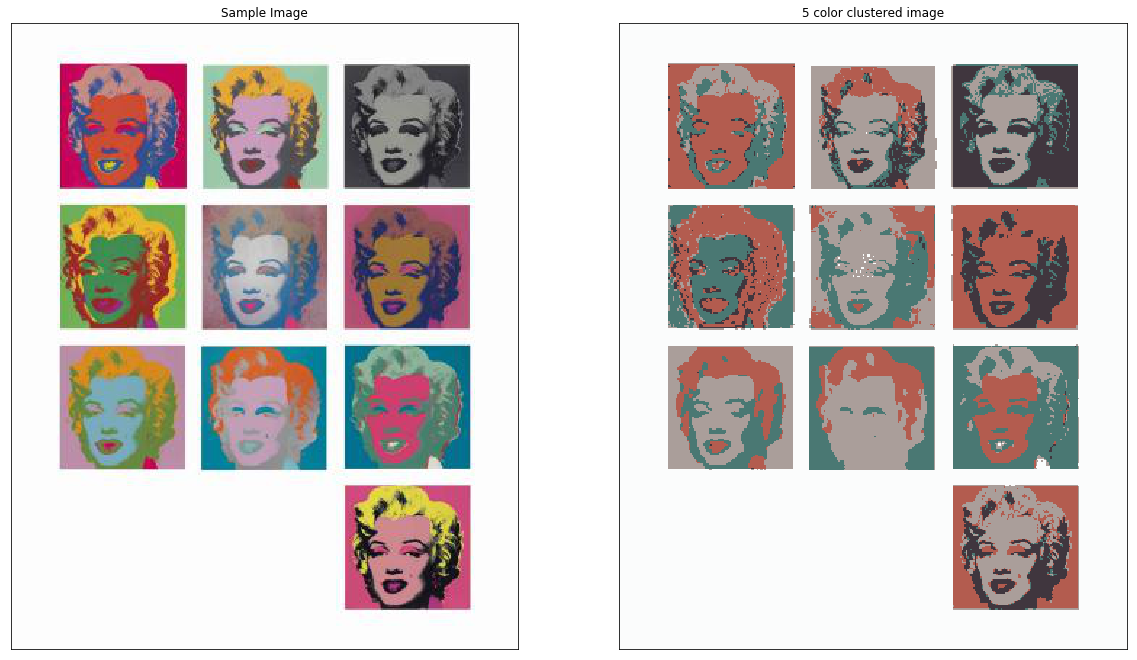

In [17]:
clusters = 5
array = scipy.misc.fromimage(theimage)
vector = array.reshape(scipy.product(array.shape[:2]), array.shape[2])
codes, distortion = scipy.cluster.vq.kmeans(vector.astype(float), clusters)
vecs, dist = scipy.cluster.vq.vq(vector, codes) 
counts, bins = scipy.histogram(vecs, len(codes))
index_max = scipy.argmax(counts)   
peak = codes[index_max].astype(int)

colour = binascii.hexlify(peak)

HLS = colorsys.rgb_to_hls(peak[0]/255.0,peak[1]/255.0,peak[2]/255.0)
hueAngle = HLS[0]*360
if (HLS[1] < 0.2):
    dominant_color = "blacks"
elif (HLS[1] > 0.8):
    dominant_color = "whites"
elif (HLS[2] < 0.25):
    dominant_color = "grays"
elif (hueAngle < 30):
    dominant_color = "reds"
elif (hueAngle < 90):
    dominant_color = "yellows"
elif (hueAngle < 150):
    dominant_color = "greens"
elif (hueAngle < 210):
    dominant_color = "cyans"
elif (hueAngle < 270):
    dominant_color = "blues"
elif (hueAngle < 330):
    dominant_color = "magentas"
else:
    dominant_color = "reds"

print ('The most dominant color is %s' % dominant_color)

c = vector.copy()
for j, code in enumerate(codes):
    c[scipy.r_[scipy.where(vecs==j)],:] = code   
scipy.misc.imsave('clusters_' + str(j) + '.png' , c.reshape(*array.shape))

img=np.array(theimage) 
mostDominant = c.reshape(*array.shape)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img)
plt.title('Sample Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(mostDominant)
plt.title('%s color clustered image' % clusters), plt.xticks([]), plt.yticks([])
None

## Mean Brightness

Convert the image into grayscale mode, where black is 0 and white is 255. The mean value of the grayscale image is our average brightness.

The average brightness is 187


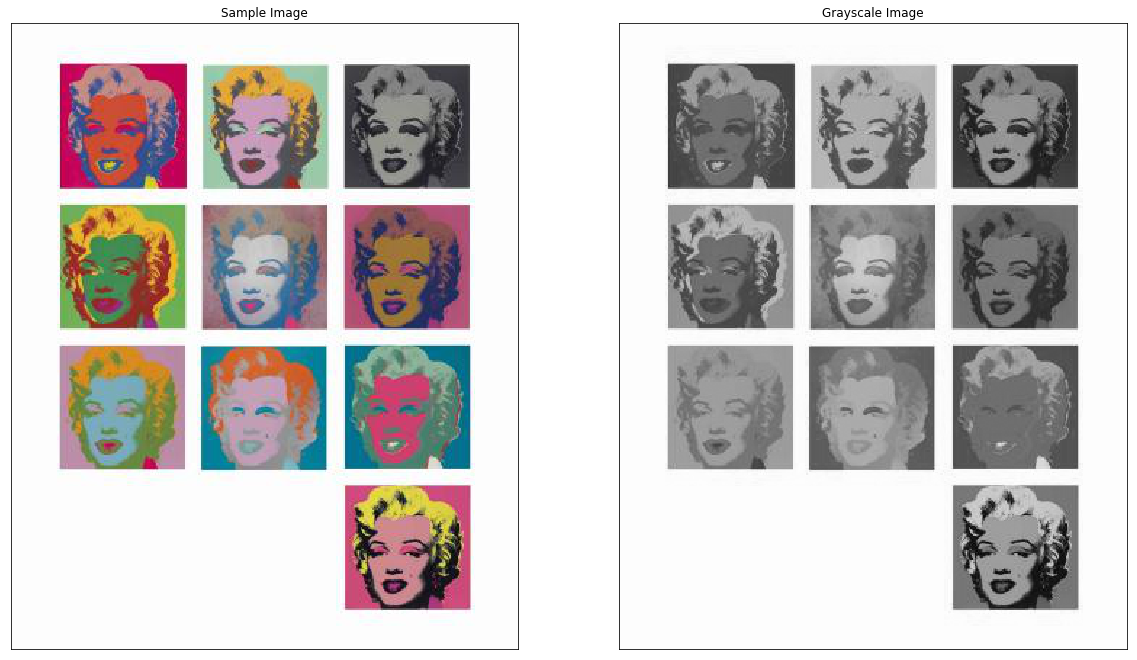

In [19]:
imageBW = theimage.convert('LA')
theImageStat = ImageStat.Stat(imageBW)
brightness = int(theImageStat.mean[0])

print ('The average brightness is %s' % brightness)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img)
plt.title('Sample Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imageBW)
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Unique Color Per Pixel

This function calculates the number of unique colors in an image as a ration of the total number of pixels. A list of color values across the image is generated. Duplicates are removed and the length of the duplicate-free list is calculated and divded by total number of pixels. If the result is close to 0, the image has very few unique colors i.e. large areas of one solid color. If the result is close to 1, the image is very colorful as every pixel has its own unique color. A 0 result indicates a grayscale image.

In [5]:
def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

This image has 56541 unique colors and 151200 pixels
The unique color ratio is 0.37


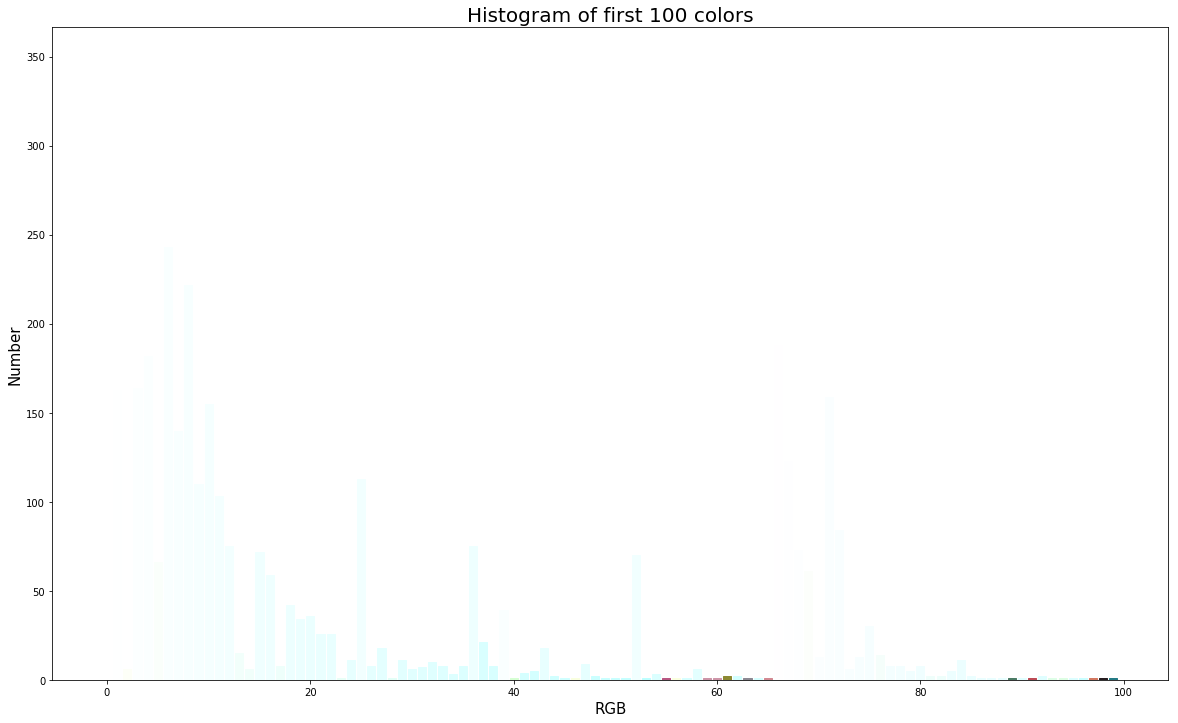

In [22]:
ImageStatColor = ImageStat.Stat(theimage) 
vector_list = vector.tolist()
unique = [list(x) for x in set(tuple(x) for x in vector_list)]
unique_colors = len(unique) 
unique_color_ratio = round(float(unique_colors)/ImageStatColor.count[0],2)

print ('This image has %s unique colors and %s pixels' % (unique_colors, ImageStatColor.count[0]))
print ('The unique color ratio is %s' % unique_color_ratio)

limit = 100
w, h = theimage.size  
colors = theimage.getcolors(w*h)
Sub = colors[0:limit]

plt.figure(figsize=(20,12))
for i in range(0,len(mySub)):
    idx = Sub[i][0]
    rgb = Sub[i][1]
    plt.bar(i ,idx, color=hexencode(rgb),edgecolor=hexencode(rgb))
plt.title('Histogram of first %s colors' % limit , fontsize =20 )
plt.xlabel('RGB', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.show()

## Image Thresholding

Here, we apply a thresholding to the image. If pixel value is greater than a threshold value(here we use 127, range from 0-255), it is assigned one value (255,white), else it is assigned another value (0,black). Then we calculate the Percentage of white or black in the image, so we can get the ratio of black pixels in the greyscale of paintings.

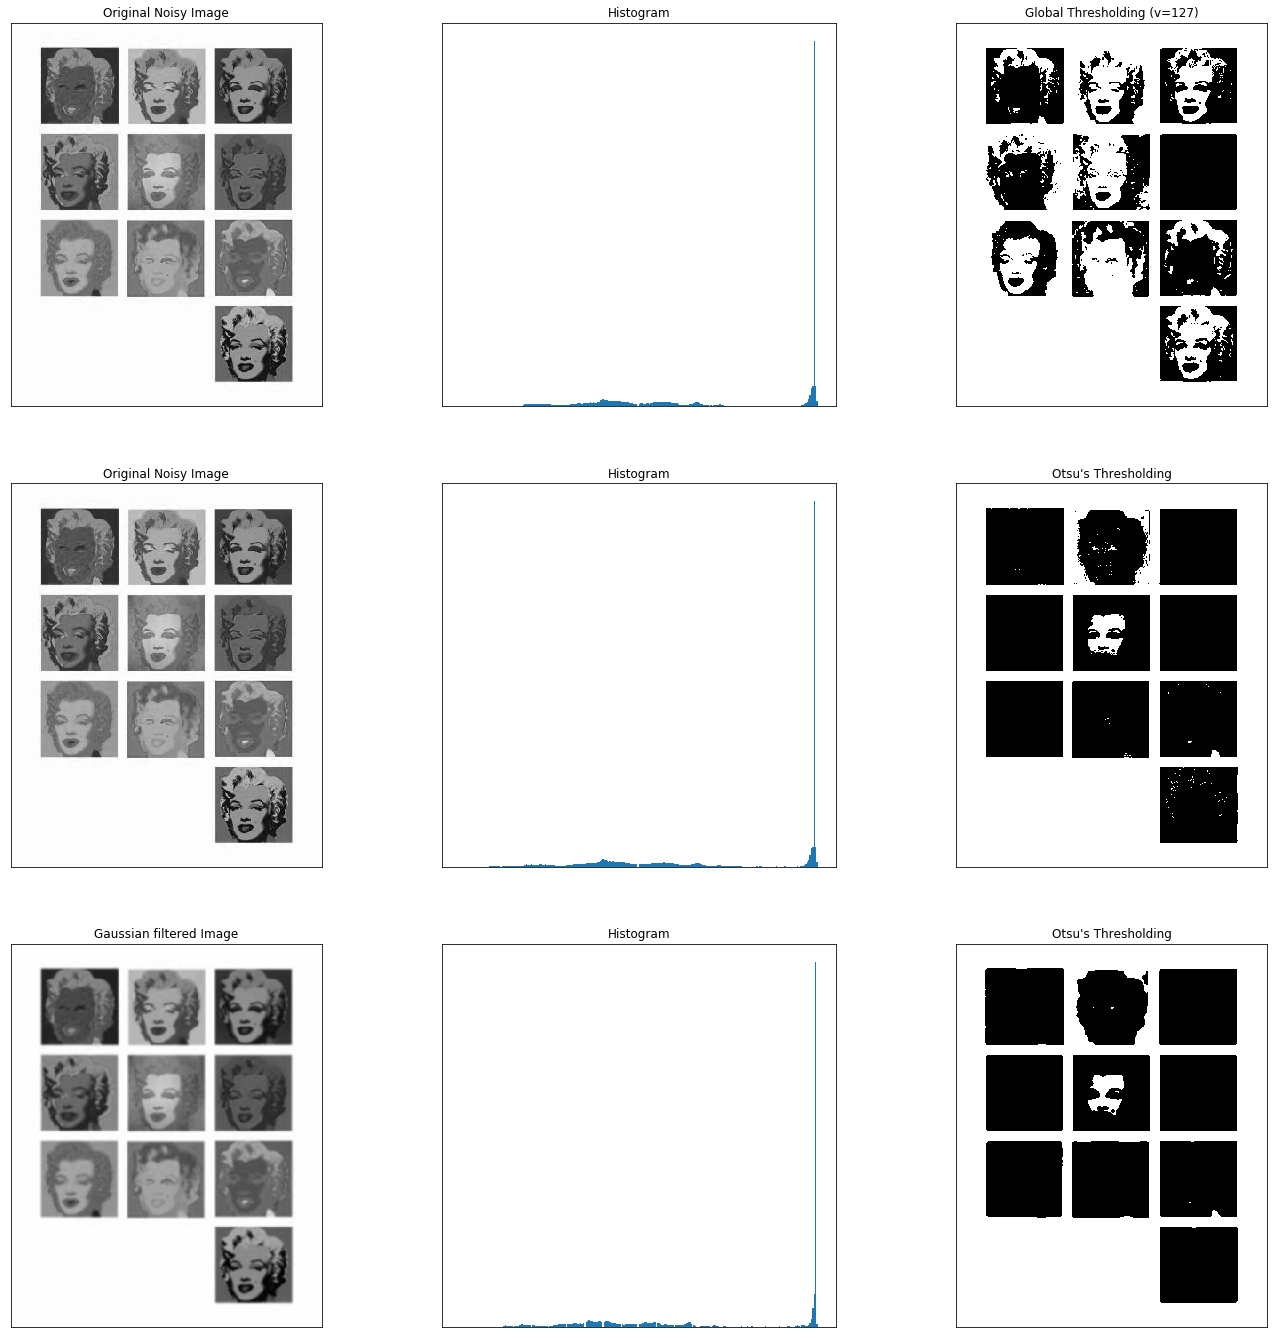

In [7]:
img=np.array(theimage)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(24,24))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Relative High and low Brightness Ratio

We calculate the average brightness of each paintings here. Then we counts how many pixels have two times of the average brightness and how many pixels have less than half of the mean brightness of that image. So we can get the ratio of these two relatively values of each image. Because different from the mean brightness of overall image, sometimes we say this image has brightness because it has more higher ratio of bright pixels compare to the low pixels. We may get the feeling by comparision. One image has average of 100 brightness but has very low std does not feel more bright than a painting with 90 brightness but has a higher std.

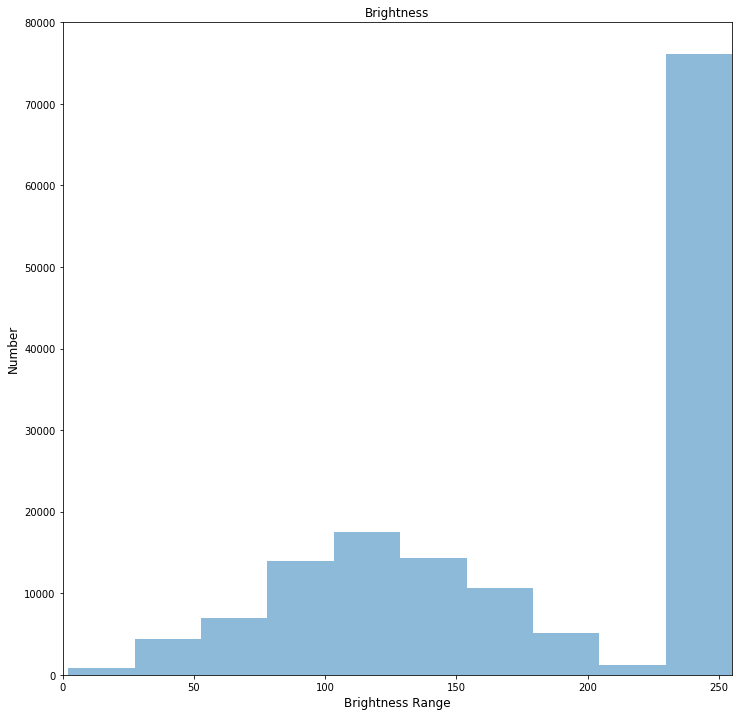

In [20]:
img=np.array(theimage) 
Lum=[]
for i in img:
    for R,G,B in i:
      Lum.append((0.2126*R) + (0.7152*G) + (0.0722*B))  
lm=np.mean(Lum)

fig = plt.figure(figsize=(12,12))
plt.hist(Lum, bins=10,alpha=0.5)
plt.title('Brightness')
plt.xlabel('Brightness Range', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.xlim([0,255])
None

## Harris Corner Detection

We use Harris Corner Detection to detect the corner in the paiting. Corner is the intersection of two edges, it represents a point in which the directions of these two edges change. Hence, the gradient of the image (in both directions) have a high variation, which can be used to detect it. With that, we can calcluate the ration of pixels as corners in the full image.

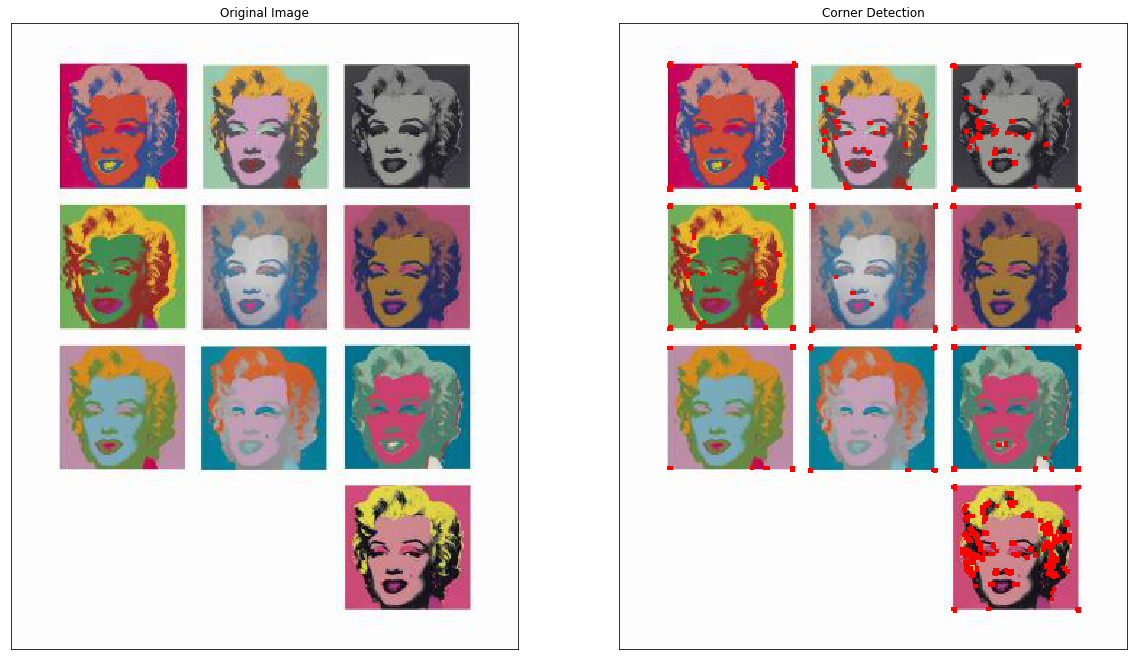

In [9]:
img=np.array(theimage) 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img2=np.array(theimage) 
img2[dst>0.02*dst.max()]=[255,0,0]

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2)
plt.title('Corner Detection'), plt.xticks([]), plt.yticks([])
None

## Canny Edge Detection

This function use Canny Edge Detection algorithm to detect the edges in the image. And then calculate the percentage of pixels recognized as edges in the whole picture.

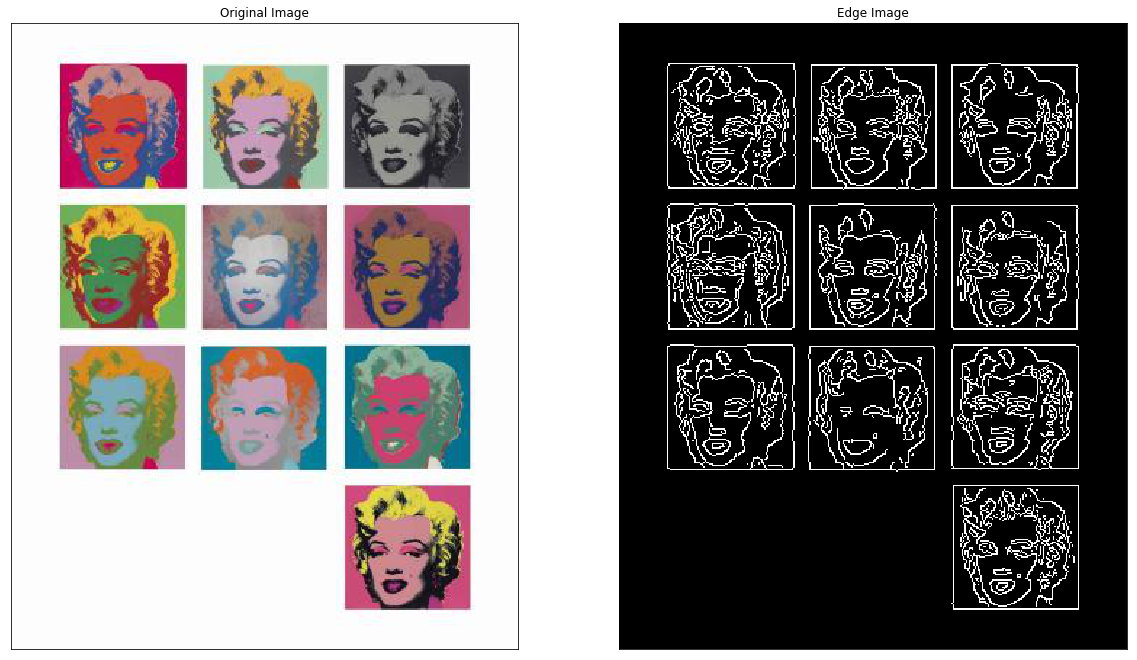

In [10]:
img=np.array(theimage)
edges = cv2.Canny(img,100,200)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Haar-cascade Face Detection

We use Haar-cascade Detection in OpenCV to detect the face in paintings. With that, we could know whether this looks like a portrait in a way. Because in contemporary paitings, it is hard to understand the image. Portrait does not necessarily means a portrait. We want to test for a paitings which is somewhat readable as human or face will have different influence on the price. We load haarcascade_frontalface_default as XML classifiers. It will show how many faces are detected in the paitings.

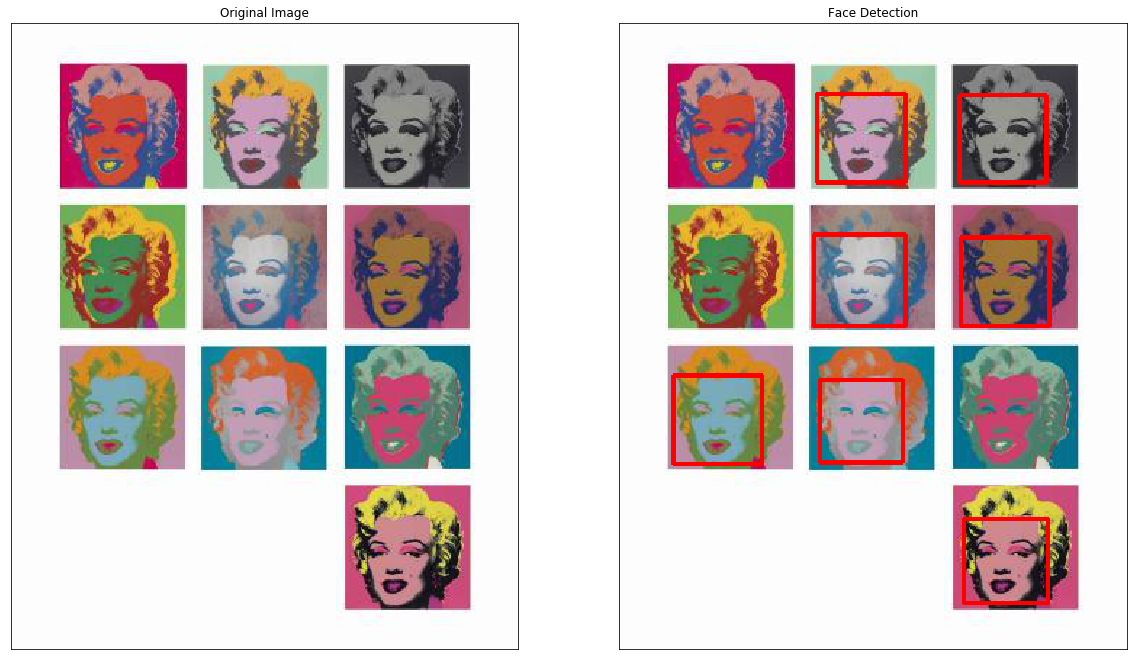

In [11]:
face_cascade = cv2.CascadeClassifier('/usr/local/opt/opencv/share/OpenCV/haarcascades/haarcascade_frontalface_alt.xml') 
img=np.array(theimage) 
img2=np.array(theimage) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img2)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img)
plt.title('Face Detection'), plt.xticks([]), plt.yticks([])
None